In [1072]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import warnings
warnings.filterwarnings("ignore")

In [1073]:
#load data 
dataset=pd.read_csv("D:/GUVI PRACTICE/emp_attrition.csv")
df=pd.DataFrame(dataset)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [1074]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [1075]:
#DATA PREPROCESSING AND CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1076]:
df.shape

(1470, 35)

In [1077]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [1078]:
df["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [1079]:
df["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [1080]:
df["EducationField"].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [1081]:
df["Gender"].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [1082]:
df["JobRole"].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [1083]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [1084]:
df["OverTime"].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [1085]:
#CHECK MISSIG VALUE
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1086]:
df.duplicated().sum()

np.int64(0)

In [1087]:

#drop columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [1088]:
#EDA

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


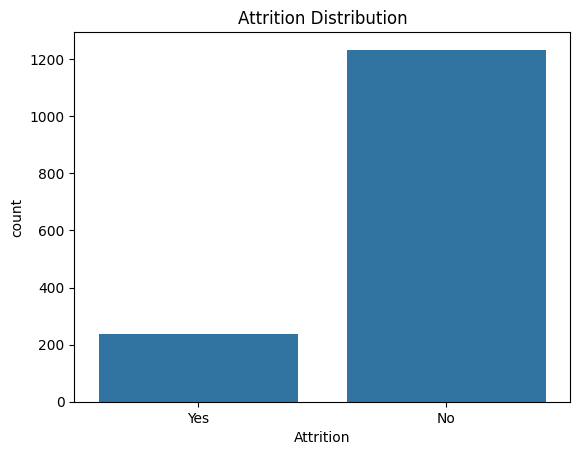

In [1089]:
#univariate analysis
#ATTRITION COUNT PLOT
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

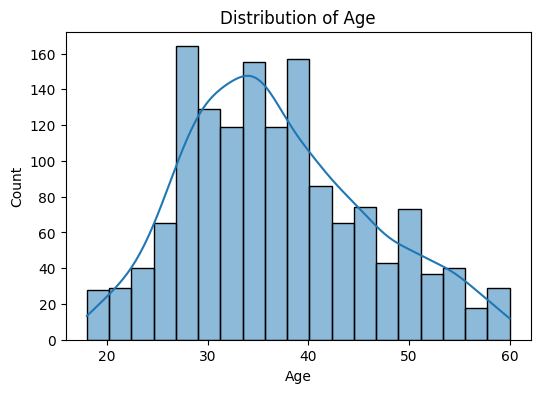

In [1090]:
#Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


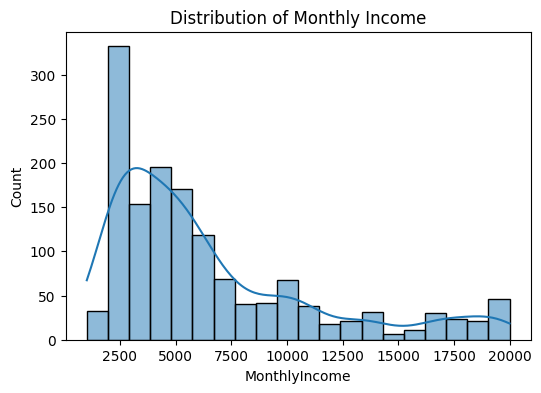

In [1091]:
#Distribution of Monthly Income
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Distribution of Monthly Income')
plt.show()


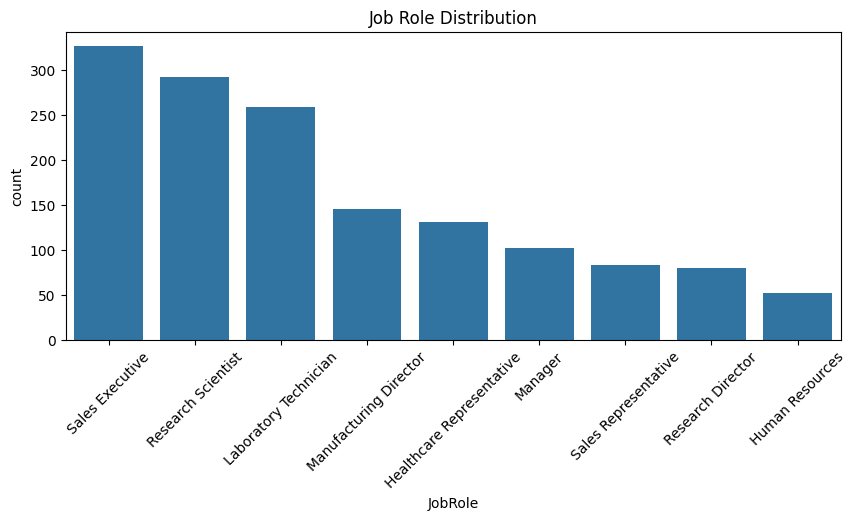

In [1092]:
#Count Plot of Job Role
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='JobRole')
plt.title('Job Role Distribution')
plt.xticks(rotation=45)
plt.show()


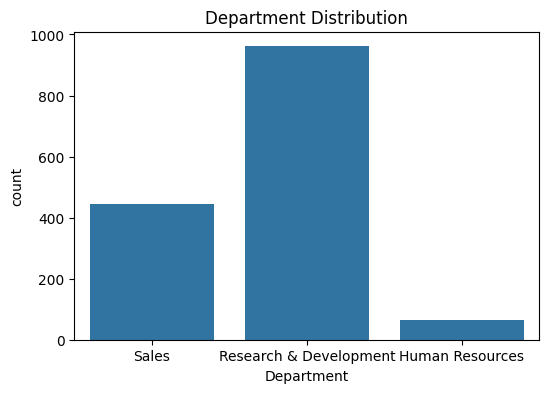

In [1093]:
#Count Plot of Department
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Department')
plt.title('Department Distribution')
plt.show()


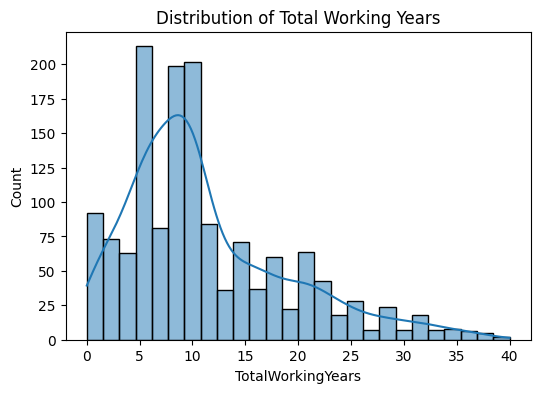

In [1094]:
#Distribution of Total Working Years
plt.figure(figsize=(6,4))
sns.histplot(df['TotalWorkingYears'], kde=True)
plt.title('Distribution of Total Working Years')
plt.show()


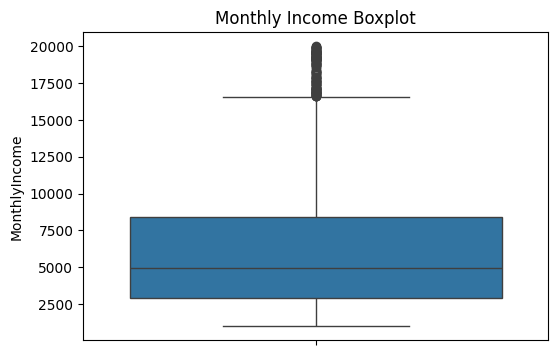

In [1095]:
#Boxplot of Monthly Income
plt.figure(figsize=(6,4))
sns.boxplot(df['MonthlyIncome'])
plt.title('Monthly Income Boxplot')
plt.show()


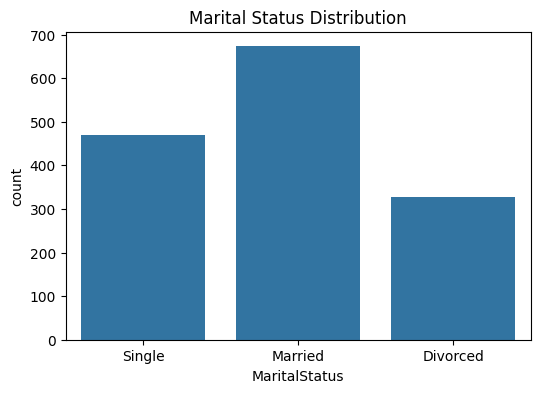

In [1096]:
#Count Plot of Marital Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='MaritalStatus')
plt.title('Marital Status Distribution')
plt.show()


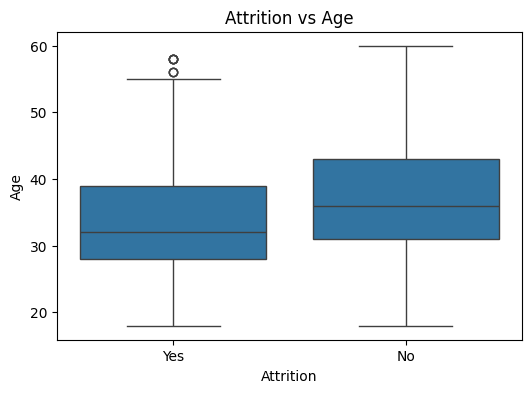

In [1097]:
#bivariate analysis
#attrition vs age 
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Attrition vs Age')
plt.show()

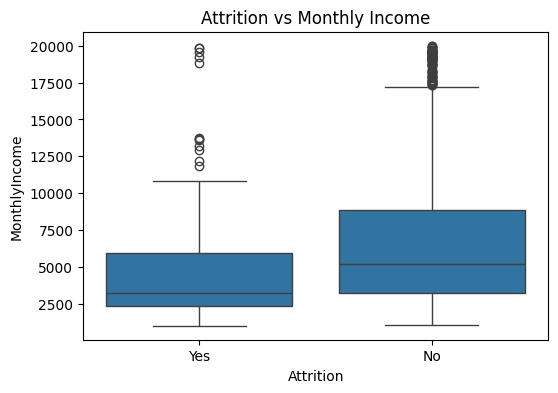

In [1098]:
#attrition vs monthly income
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition vs Monthly Income')
plt.show()

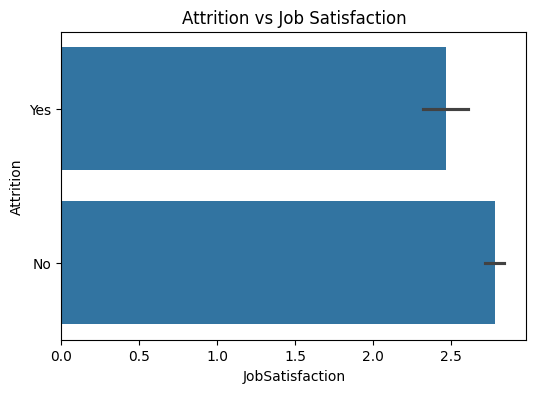

In [1099]:
#attrition vs job satisfaction
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='JobSatisfaction', y='Attrition')
plt.title('Attrition vs Job Satisfaction')
plt.show()

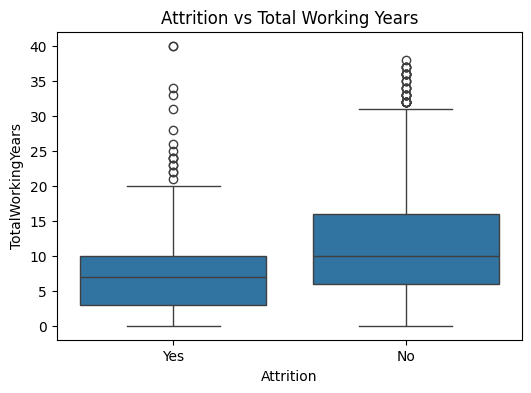

In [1100]:
#attrition vs total working years 
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Attrition vs Total Working Years')
plt.show()

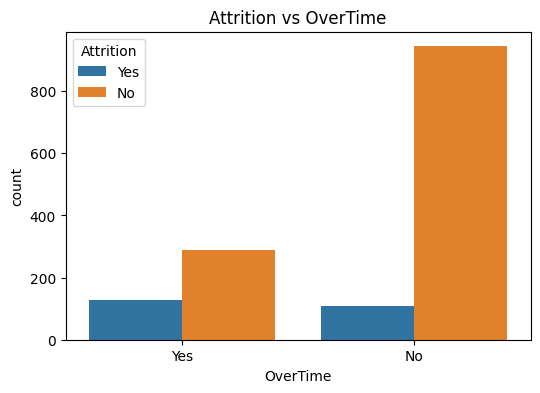

In [1101]:
#attrition vs overtime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition vs OverTime')
plt.show()

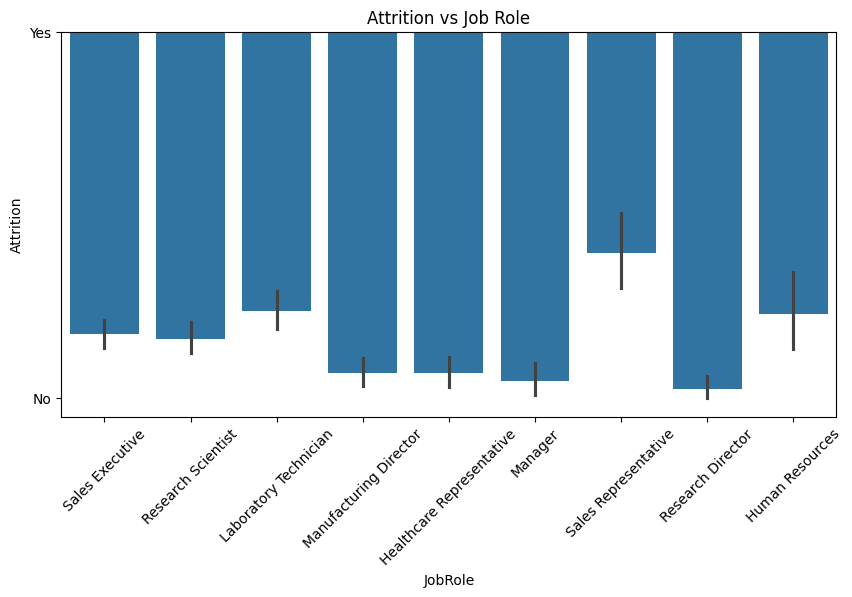

In [1102]:
#Attrition vs Job Role
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='JobRole', y='Attrition')
plt.title('Attrition vs Job Role')
plt.xticks(rotation=45)
plt.show()

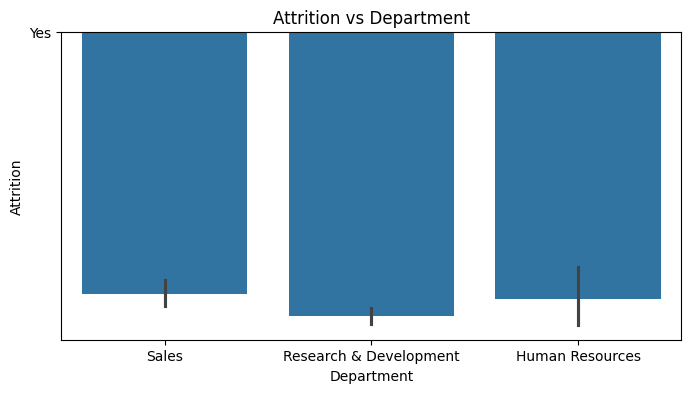

In [1103]:
#Attrition vs Department
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Department', y='Attrition')
plt.title('Attrition vs Department')
plt.show()


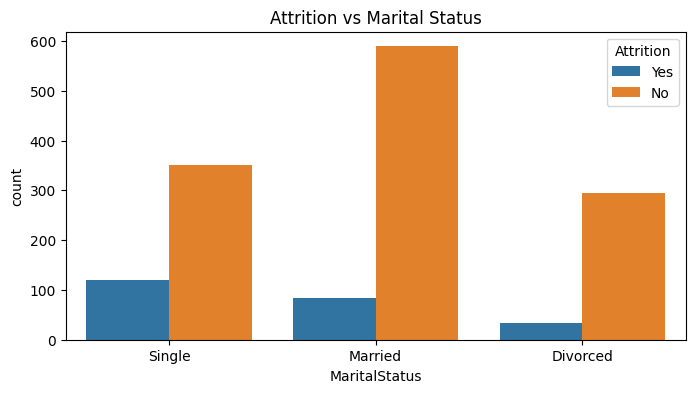

In [1104]:
#Attrition vs Marital Status
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition vs Marital Status')
plt.show()

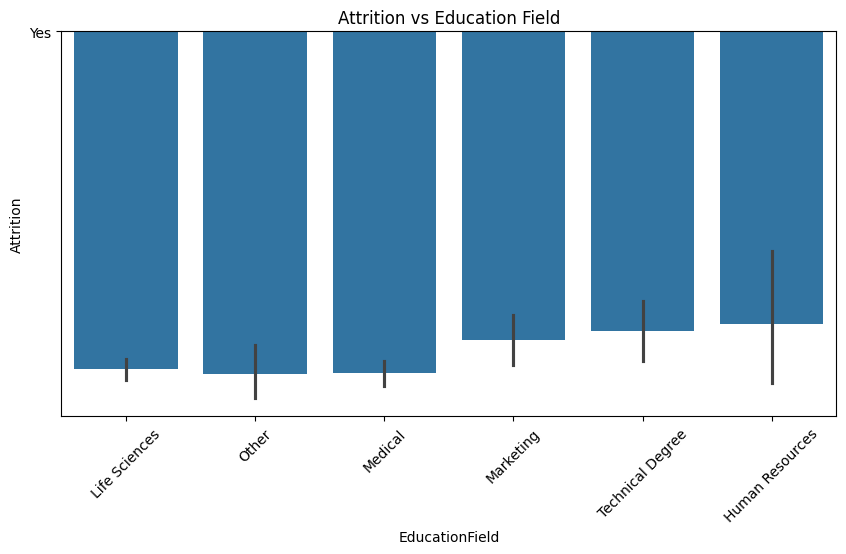

In [1105]:
#Attrition vs Education Field
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='EducationField', y='Attrition')
plt.title('Attrition vs Education Field')
plt.xticks(rotation=45)
plt.show()

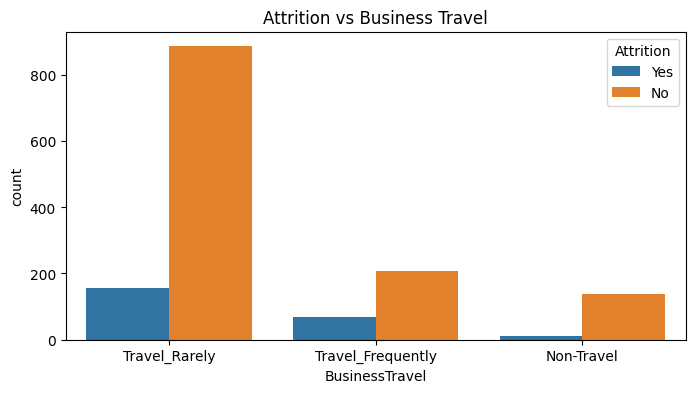

In [1106]:
#Attrition vs Business Travel
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition vs Business Travel')
plt.show()

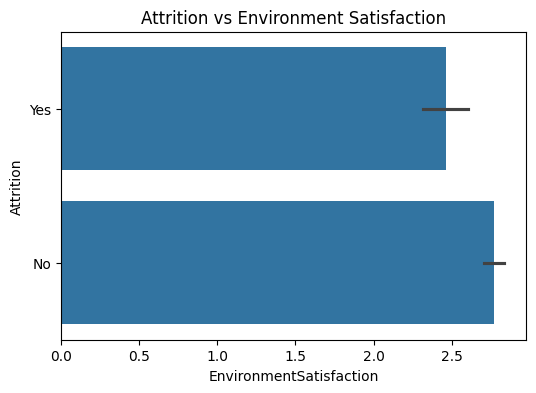

In [1107]:
#Attrition vs Environment Satisfaction
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='EnvironmentSatisfaction', y='Attrition')
plt.title('Attrition vs Environment Satisfaction')
plt.show()

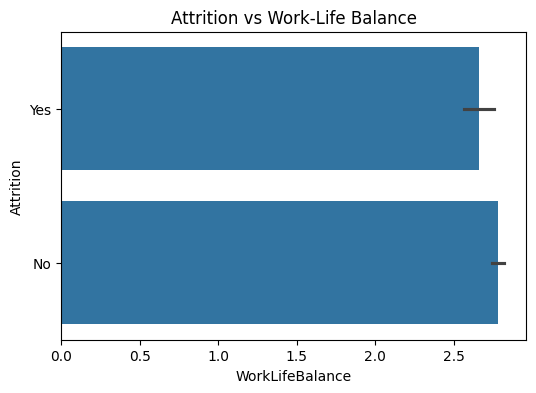

In [1108]:
#Attrition vs Work-Life Balance
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='WorkLifeBalance', y='Attrition')
plt.title('Attrition vs Work-Life Balance')
plt.show()

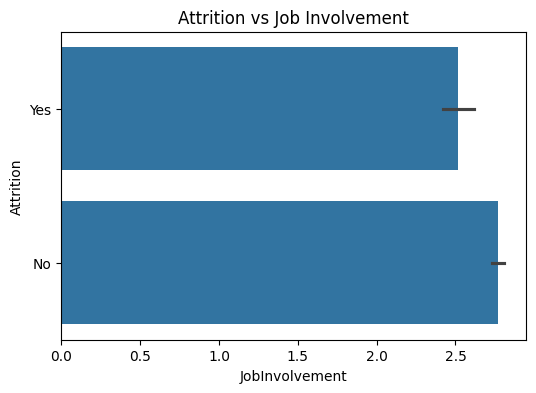

In [1109]:
#Attrition vs Job Involvement
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='JobInvolvement', y='Attrition')
plt.title('Attrition vs Job Involvement')
plt.show()

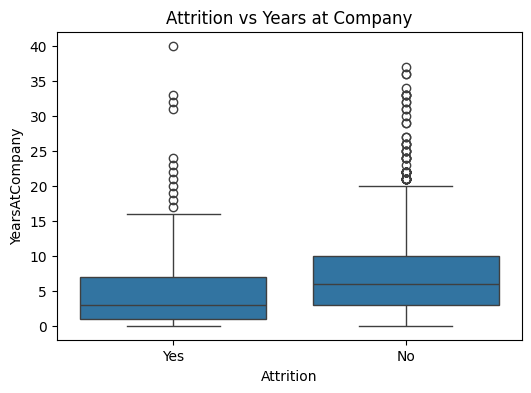

In [1110]:
#Attrition vs Years at Company
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Attrition vs Years at Company')
plt.show()

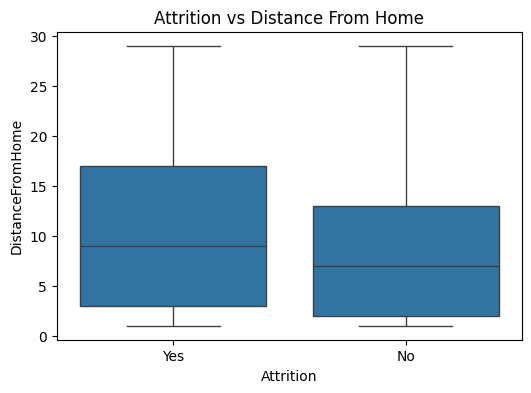

In [1111]:
#Attrition vs Distance From Home
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Attrition vs Distance From Home')
plt.show()

In [1112]:
# Encoding categorical variables

le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
# For Gender
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

# For OverTime
le_overtime = LabelEncoder()
df["OverTime"] = le_overtime.fit_transform(df["OverTime"])

In [1113]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

ohe_df = pd.DataFrame(
    ohe.fit_transform(df[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols)
)

df = pd.concat([df.drop(categorical_cols, axis=1), ohe_df], axis=1)



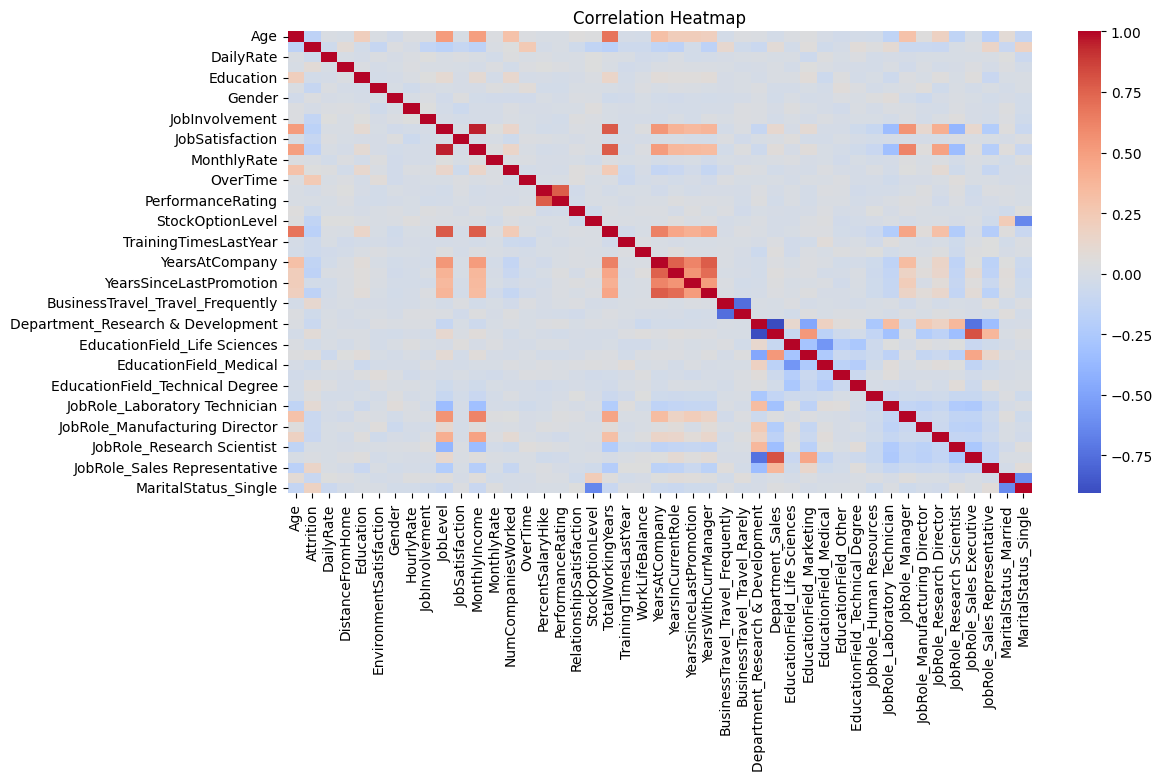

In [1114]:
#CORRELATION HEATMAP
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [1115]:
#FEATURE ENGINEERING
#split features and labels

x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [1116]:
#train-test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1117]:
#standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [1118]:
#Machine Learning Model Development

lr = LogisticRegression()
lr.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1119]:
lr.score(x_test, y_test)

0.8639455782312925

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.33      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.60      0.51      0.49       294
weighted avg       0.80      0.86      0.81       294



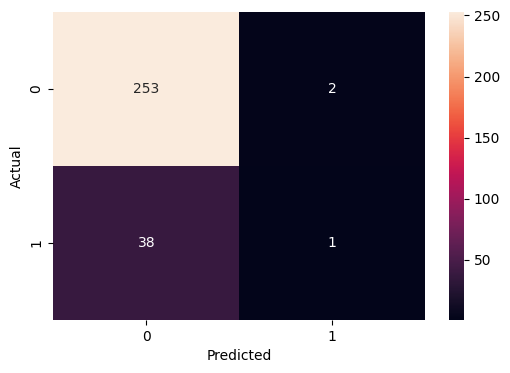

In [1120]:
y_hat=lr.predict(x_test)
accuracy_score(y_test,y_hat)
print(classification_report(y_test,y_hat))
cm =confusion_matrix(y_test,y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1121]:
#knn
knn=KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train, y_train)

,n_neighbors,38
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [1122]:
knn.score(x_test, y_test)

0.8673469387755102

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



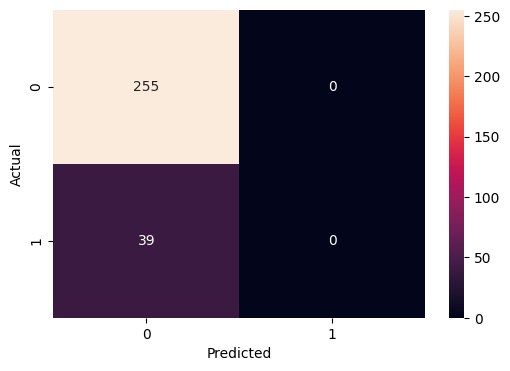

In [1123]:
y_hat=knn.predict(x_test)
accuracy_score(y_test,y_hat)
print(classification_report(y_test,y_hat))
cm =confusion_matrix(y_test,y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1124]:
#random forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1125]:
rf.score(x_test, y_test)

0.8775510204081632

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



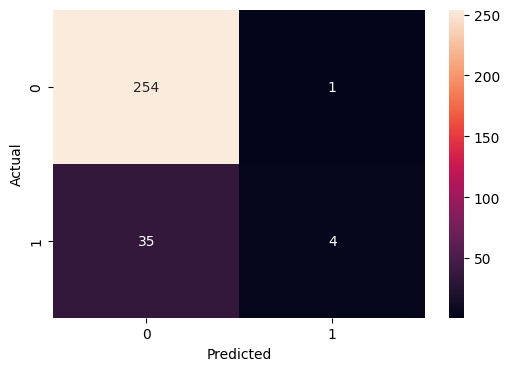

In [1126]:
y_hat=rf.predict(x_test)
accuracy_score(y_test,y_hat)
print(classification_report(y_test,y_hat))
cm =confusion_matrix(y_test,y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1127]:
#decision tree
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1128]:
dt.score(x_test, y_test)

0.7687074829931972

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       255
           1       0.18      0.21      0.19        39

    accuracy                           0.77       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.77      0.78       294



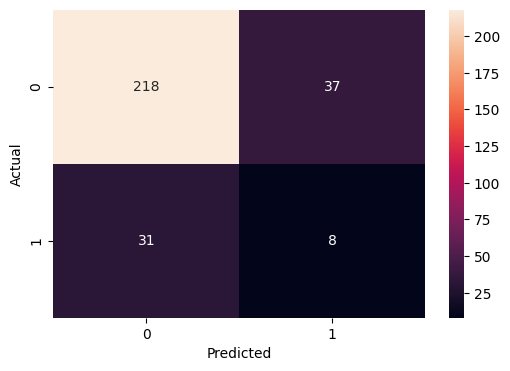

In [1129]:
y_hat=dt.predict(x_test)
accuracy_score(y_test,y_hat)
print(classification_report(y_test,y_hat))
cm =confusion_matrix(y_test,y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1130]:
#gradiant boosting
gb= GradientBoostingClassifier()
gb.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [1131]:
gb.score(x_test, y_test)

0.8707482993197279

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.54      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.84      0.87      0.84       294



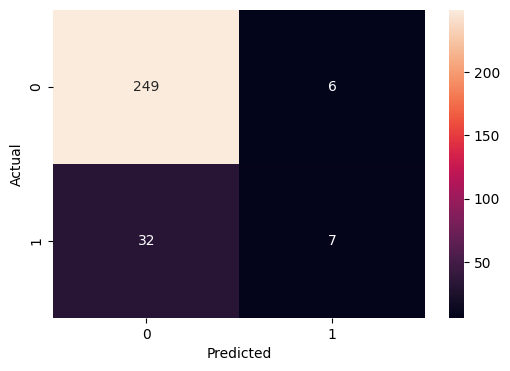

In [1132]:
y_hat=gb.predict(x_test)
accuracy_score(y_test,y_hat)
print(classification_report(y_test,y_hat))
cm =confusion_matrix(y_test,y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1133]:
from sklearn.metrics import accuracy_score

# Predictions for all models
models = {
    "Logistic Regression": lr,
    "K-Nearest Neighbors": knn,
    "Random Forest": rf,
    "Decision Tree": dt,
    "Gradient Boosting": gb
    
}

# Create empty list to store results
results = []

# Evaluate each model
for name, model in models.items():
    y_hat = model.predict(x_test)
    score = accuracy_score(y_test, y_hat)
    results.append({"Model": name, "Score": round(score, 4)})

# Create summary DataFrame
models_df = pd.DataFrame(results)

# Display neatly
print("Model Comparison:")
display(models_df.sort_values(by="Score", ascending=False))

Model Comparison:


,Model,Score
2,Random Forest,0.8776
4,Gradient Boosting,0.8707
1,K-Nearest Neighbors,0.8673
0,Logistic Regression,0.8639
3,Decision Tree,0.7687


In [1134]:
columns = x.columns.tolist()

In [1135]:
import pickle

# Save models
with open('lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('knn.pkl', 'wb') as f:
    pickle.dump(knn, f)

with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('gb.pkl', 'wb') as f:
    pickle.dump(gb, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save LabelEncoder
with open('le_gender.pkl', 'wb') as f:
    pickle.dump(le_gender, f)

with open('le_overtime.pkl', 'wb') as f:
    pickle.dump(le_overtime, f)

# Save OneHotEncoder
with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Save final columns
with open('columns.pkl', 'wb') as f:
    pickle.dump(columns, f)